In [2]:
#data challenge 'save the chocolate'
#testing the efficacy of supplementing organic fertilizer with leaf mulch or rotting bananas
#also look at hand vs. open pollination 
#upload the Tree and Flowering marking data to analyze the result


import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import json
import matplotlib

#upload the Tree and Flowering marking data to analyze the result

df_flower_marking = pd.read_csv("/Users/meghan/Desktop/SaveTheChocolate/FlowerMarking - Sheet1.csv")
print(df_flower_marking)

df_tree_data = pd.read_csv("/Users/meghan/Desktop/SaveTheChocolate/TreeData - Sheet1.csv")
print(df_tree_data)

df_collecting_events = pd.read_csv("/Users/meghan/Desktop/SaveTheChocolate/CollectingEvents - Sheet1.csv")
print(df_collecting_events)

df_specimen_IDs = pd.read_csv("/Users/meghan/Desktop/SaveTheChocolate/Specimen_IDs - Sheet1.csv")
print(df_specimen_IDs)

      CollectingEvent Chakra  Tree Dist   Ht  Diam Trt  Branch        Date  \
0                2501    CC1     1   23  123  7.00   O       A  10/21/2016   
1                2501    CC1     1  184  201  1.50   H  B4C4-5  10/21/2016   
2                2501    CC1     1   94  184  6.00   O    A6-7  10/21/2016   
3                2501    CC1     1   87  150  8.00   O       B  10/21/2016   
4                2501    CC1     1  104  162  7.00   H    B1-2  10/21/2016   
...               ...    ...   ...  ...  ...   ...  ..     ...         ...   
1828             2525    RB2    14  185  167  2.00   H   A2B-C  11/29/2016   
1829             2525    RB2    14  198  171  2.00   O     A2C  11/29/2016   
1830             2525    RB2    14  219  175  1.75   O   A2C-D  11/29/2016   
1831             2525    RB2    14  223  177  1.75   H   A2C-D  11/29/2016   
1832             2525    RB2    14  245  183  1.50   O     A2D  11/29/2016   

     Fruit (y/n)  Size (if Y for Fruit) Notes  
0              

In [3]:
#what kinds of insects do you find?

df_specimen_IDs.groupby(['Order','Family']).count()

#collembola cecido: springtail
#diptera brachycera: fly
#diptera cecidomyiidae: gnat
#diptera ceratopogonidae: biting midge
#diptera chironomidae: non-biting midge
#diptera psychodidae: drain fly/sewer gnat
#hemiptera aphidae: aphid
#hemiptera fulgoridae: plant hoppers
#hemiptera sternorrhyncha: aphids, whiteflies, and scales
#hymenoptera aprocrita: wasp/bee/ant
#hymenoptera formicidae: ant 
#hymenoptera parasitoid: parasitic wasp
#hymenoptera platygastridae: parasitic wasp

#PARASITIC WASPS MAY BE KILLING THE MIDGES 

Essig_ID  CollE  Chakra  Tree  Storage  Sex
Order      Family                                                      
-          -                       1      1       1     1        1    0
Collembola Cecido                  1      1       1     1        1    0
Diptera    -                       2      2       2     2        2    0
           Brach                   1      1       1     1        1    0
           Brachy                  4      4       4     4        4    0
           Cecido                384    384     384   384      384  344
           Cecido                  2      2       2     2        2    2
           Cera                   22     22      22    22       22   12
           Chiro                   5      5       5     5        5    2
           Chiro                   1      1       1     1        1    0
           Psychodidae             2      2       2     2        2    0
Hemip      Aphid                  31     31      31    31       31    0
           Fulgoro                 4      4       4     4        4    0
           OH                      2      2       2     2        2    0
           Sterno                  1      1       1     1        1    0
Hymen      Apocrita                1      1       1     1        1    0
           Formacid                1      1       1     1        1    0
           Formicid               78     78      78    78       78    0
           Parasitoid              3      3       3     3        3    0
           Parasitoid Wasp         9      9       9     9        9    0
           Parasitoid wasp         1      1       1     1        1    0
           Platy                  39     39      39    39       39    0

In [4]:
#Identify trees with parasitic wasps
#first make protracted dataframe
df_specimens_by_tree = df_specimen_IDs[['Chakra', 'Tree', 'Order', 'Family']].dropna()

#make Tree_ID
df_specimens_by_tree['Tree_ID']= df_specimens_by_tree[['Chakra', 'Tree']].apply(lambda row: row[0]+'_'+str(row[1]), axis=1)

In [5]:
#make a function to ID parasitic wasps

def wasp_pos(wasp): 
    if (wasp[2]=='Hymen') and (wasp[3]!='Formicid'):
        return 1
    else:
        return 0 
    
#apply to df    
df_specimens_by_tree['wasp_pos']= df_specimens_by_tree.apply(lambda x: wasp_pos(x), axis=1)

In [6]:
df_specimens_by_tree.head()

,Chakra,Tree,Order,Family,Tree_ID,wasp_pos
0,SJ1,11,Hymen,Platy,SJ1_11,1
1,SJ1,11,Diptera,Cecido,SJ1_11,0
2,SJ1,10,Diptera,Cera,SJ1_10,0
3,SJ1,10,Diptera,Cecido,SJ1_10,0
4,SJ1,10,Diptera,Cecido,SJ1_10,0


35


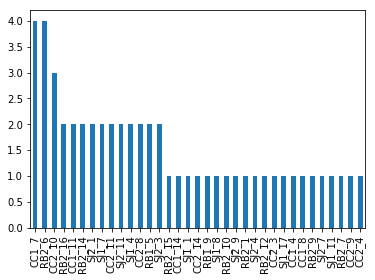

In [7]:
#graph trees with wasps by count 
trees_w_wasps = df_specimens_by_tree[df_specimens_by_tree['wasp_pos']==1]

wasp_counts_by_tree = df_specimens_by_tree[df_specimens_by_tree['wasp_pos']==1]['Tree_ID'].value_counts()

wasp_counts_by_tree.plot(kind='bar')
print(len(wasp_counts_by_tree))

/Users/meghan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/meghan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


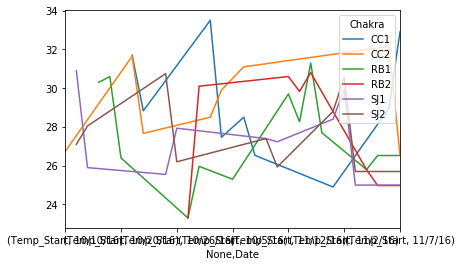

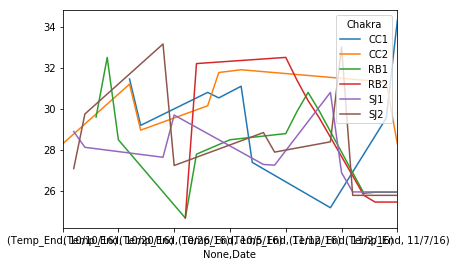

In [8]:
#look at temperature fluctuations over collection time by field (Chakra)

df_temp_fluc = df_collecting_events[['Chakra', 'Date', 'Temp_Start', 'Temp_End']]

df_temp_fluc['Temp_Start'] = df_temp_fluc['Temp_Start'].apply(lambda x:  None if (x == 'na') else float(x))
df_temp_fluc['Temp_End'] = df_temp_fluc['Temp_End'].apply(lambda x:  None if (x == 'na') else float(x))


df_temp_by_chakra =df_temp_fluc.sort_values(by=['Chakra'])

#graph start temperatures
df_temp_by_chakra_start= df_temp_by_chakra[['Chakra', 'Date', 'Temp_Start']]
df_start_temp = df_temp_by_chakra_start.groupby(['Chakra', 'Date']).mean().unstack().T
df_start_temp.interpolate(method='linear').plot(x_compat=False)

#graph end temperatures
df_temp_by_chakra_end= df_temp_by_chakra[['Chakra', 'Date', 'Temp_End']]
df_end_temp = df_temp_by_chakra_end.groupby(['Chakra', 'Date']).mean().unstack().T
df_end_temp.interpolate(method='linear').plot(x_compat=False)

In [9]:
# create a simple data frame that joins the data from the tree and flower data using the tree ID 

Flower_Tree_df = pd.merge(df_tree_data, df_flower_marking, how='inner', on=['Tree', 'Chakra'])

#drop last two columns (fruit size and notes)
Flower_Tree_df = Flower_Tree_df.drop([Flower_Tree_df.columns[17], Flower_Tree_df.columns[18]], axis=1)

#Make fruit specs 0 for N and 1 for Y

Flower_Tree_df_boolean = Flower_Tree_df.replace({Flower_Tree_df.columns[16]:{"Y":1, "N":0}})
Flower_Tree_df_boolean

,Chakra,Tree,Treatment,Type,Trunk Cir.,Canopy HT,Water,Shade,Cover,CollectingEvent,Dist,Ht,Diam,Trt,Branch,Date,Fruit (y/n)
0,CC1,1,LB,G,47,380.0,N,10,25,2501,23,123,7.00,O,A,10/21/2016,0
1,CC1,1,LB,G,47,380.0,N,10,25,2501,184,201,1.50,H,B4C4-5,10/21/2016,0
2,CC1,1,LB,G,47,380.0,N,10,25,2501,94,184,6.00,O,A6-7,10/21/2016,0
3,CC1,1,LB,G,47,380.0,N,10,25,2501,87,150,8.00,O,B,10/21/2016,0
4,CC1,1,LB,G,47,380.0,N,10,25,2501,104,162,7.00,H,B1-2,10/21/2016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1828,SJ2,17,LB,G,42,355.0,N,25,25,2520,266,178,0.75,H,A3A2C-D,11/18/2016,0
1829,SJ2,17,LB,G,42,355.0,N,25,25,2520,200,171,1.25,O,A3A4,11/18/2016,0
1830,SJ2,17,LB,G,42,355.0,N,25,25,2520,267,155,0.75,O,A3A5A,11/18/2016,0
1831,SJ2,17,LB,G,42,355.0,N,25,25,2520,305,150,1.00,H,A4B1C,11/18/2016,0


In [10]:
#drop data with NaN in chakra or tree
Flower_Tree_df_boolean[['Chakra', 'Tree']].dropna()

#create tree ID
Flower_Tree_df_boolean['Tree_ID']= Flower_Tree_df_boolean[['Chakra', 'Tree']].apply(lambda row: row[0]+'_'+str(row[1]),axis=1)

Flower_Tree_df_boolean['Chakra'].value_counts()


RB2    336
SJ2    325
RB1    322
CC2    309
SJ1    289
CC1    252
Name: Chakra, dtype: int64

In [11]:
#test to see if you can predict open pollination vs. hand pollination by tree features.
#look at with wasp trees included and excluded


In [33]:

#count the number of fruits based on tree, ground treatment, pollination treatment
rename = Flower_Tree_df_boolean.rename(columns={Flower_Tree_df_boolean.columns[16]: 'Fruit'})

Flower_Tree_df_abbr = rename.filter(['Tree_ID', 'Treatment', 'Trt', 'Fruit'], axis=1)

#sort values by treatment, tree, trt, then fruit
Flower_Tree_df_sort = Flower_Tree_df_abbr.sort_values(by=['Treatment', 'Tree_ID', 'Trt'])

#group by treatment, tree, trt count number of fruit vs non-fruit
Flower_Tree_df_group = Flower_Tree_df_sort.groupby(['Treatment','Tree_ID', 'Trt'])['Fruit'].value_counts().unstack().fillna(0)

#Flower_Tree_df_group_nobc= Flower_Tree_df_group.drop(['BC'], axis=0)

#calculate a percent fruit for each unique condition
Flower_Tree_df_group['percent_success'] = (Flower_Tree_df_group[1]/(Flower_Tree_df_group[1]+Flower_Tree_df_group[0]))
Flower_Tree_df_group[['percent_success']]


Fruit                  percent_success
Treatment Tree_ID Trt                 
LB        CC1_1   H           0.222222
                  O           0.000000
          CC1_10  H           0.500000
                  O           0.000000
          CC1_15  H           0.000000
...                                ...
NN        SJ2_11  O           0.000000
          SJ2_14  H           0.750000
                  O           0.000000
          SJ2_2   H           0.285714
                  O           0.000000

[202 rows x 1 columns]

In [35]:
Flower_Tree_df_group


Fruit                     0    1   BC  percent_success
Treatment Tree_ID Trt                                 
LB        CC1_1   H     7.0  2.0  0.0         0.222222
                  O    18.0  0.0  0.0         0.000000
          CC1_10  H     1.0  1.0  0.0         0.500000
                  O     3.0  0.0  0.0         0.000000
          CC1_15  H     1.0  0.0  0.0         0.000000
...                     ...  ...  ...              ...
NN        SJ2_11  O    16.0  0.0  0.0         0.000000
          SJ2_14  H     1.0  3.0  0.0         0.750000
                  O     8.0  0.0  0.0         0.000000
          SJ2_2   H     5.0  2.0  0.0         0.285714
                  O    14.0  0.0  0.0         0.000000

[202 rows x 4 columns]

In [38]:
df_flower = Flower_Tree_df_group.reset_index()

df_hand_flower = df_flower[df_flower['Trt'] == 'H']

df_open_flower= df_flower[df_flower['Trt'] == 'O']


In [37]:
df_flower

Fruit,Treatment,Tree_ID,Trt,0,1,BC,percent_success
0,LB,CC1_1,H,7.0,2.0,0.0,0.222222
1,LB,CC1_1,O,18.0,0.0,0.0,0.000000
2,LB,CC1_10,H,1.0,1.0,0.0,0.500000
3,LB,CC1_10,O,3.0,0.0,0.0,0.000000
4,LB,CC1_15,H,1.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...
197,NN,SJ2_11,O,16.0,0.0,0.0,0.000000
198,NN,SJ2_14,H,1.0,3.0,0.0,0.750000
199,NN,SJ2_14,O,8.0,0.0,0.0,0.000000
200,NN,SJ2_2,H,5.0,2.0,0.0,0.285714


In [39]:
df_open_flower['pol_index'] = df_open_flower['percent_success'].values/ df_hand_flower['percent_success'].values

/Users/meghan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/meghan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/meghan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


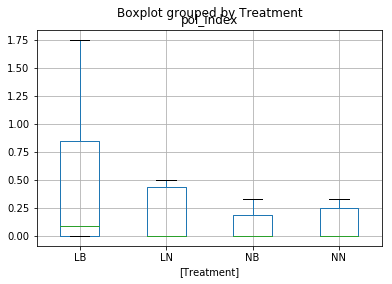

In [40]:
#make box and whiskers of trees in all conditions

df_pol_index = df_open_flower[['Treatment', 'Tree_ID', 'pol_index']]


polindex = df_pol_index.groupby(['Treatment'])['pol_index'].apply(list)
df_pol_index.boxplot(by='Treatment')

In [41]:
import scipy.stats as stats

LB = polindex['LB']
LN = polindex['LN']
NB = polindex['NB']
NN = polindex['NN']

u_statistic, pVal = stats.mannwhitneyu(NN, NB)
print('P value:')
print(pVal)

u_statistic, pVal = stats.mannwhitneyu(NN, LN)
print('P value:')
print(pVal)


u_statistic, pVal = stats.mannwhitneyu(LB, LN)
print('P value:')
print(pVal)

P value:
0.4928058676183077
P value:
0.3248214893748054
P value:
0.2037630130870125


LB    pol_index    AxesSubplot(0.1,0.559091;0.363636...
LN    pol_index    AxesSubplot(0.536364,0.559091;0.3...
NB    pol_index    AxesSubplot(0.1,0.15;0.363636x0.3...
NN    pol_index    AxesSubplot(0.536364,0.15;0.36363...
dtype: object

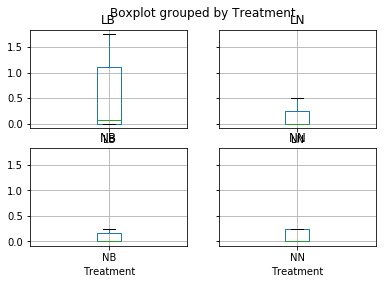

In [42]:
#make box and whiskers of trees in all conditions after removing trees with parasitic wasps
trees = trees_w_wasps['Tree_ID'].values.tolist()

trees

df_pol_index_nowasp = df_pol_index[~df_pol_index['Tree_ID'].isin(trees)]

df_pol_index_nowasp.groupby(['Treatment']).boxplot(by='Treatment', column='pol_index', return_type='axes')


In [43]:
#make boxplots in same plot 
no_wasp_list = df_pol_index_nowasp.groupby(['Treatment'])['pol_index'].apply(list)
print(len(no_wasp_list[0]))

20


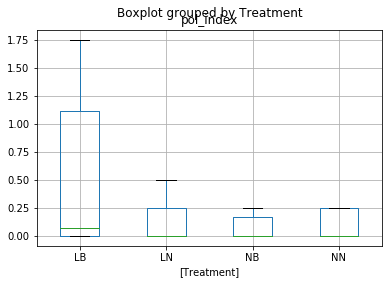

In [531]:
df_pol_index_nowasp.boxplot(by='Treatment')


In [44]:
#use Mann Whitney U to determine significance
import scipy.stats as stats

nLB = no_wasp_list['LB']
nLN = no_wasp_list['LN']
nNB = no_wasp_list['NB']
nNN = no_wasp_list['NN']

u_statistic, pVal = stats.mannwhitneyu(nNN, nNB)
print('P value:')
print(pVal)

u_statistic, pVal = stats.mannwhitneyu(nNN, nLN)
print('P value:')
print(pVal)


u_statistic, pVal = stats.mannwhitneyu(nLB, nLN)
print('P value:')
print(pVal)

P value:
0.3847053077896219
P value:
0.13595552839774655
P value:
0.10729628333173025


P value:
0.00110956839966449


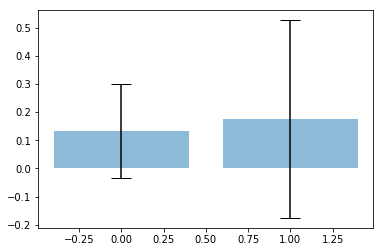

In [45]:
#establish fruiting conditions with wasps
df_pol_index_wasp = df_pol_index[df_pol_index['Tree_ID'].isin(trees)]

wasp_list = df_pol_index_wasp.groupby(['Treatment'])['pol_index'].apply(list)

wLB = wasp_list['LB']
wLN = wasp_list['LN']
wNB = wasp_list['NB']
wNN = wasp_list['NN']

import random 
import math

wasp_total_raw = wLB + wLN + wNB + wNN

nowasp_total_raw = nLB + nLN + nNB + nNN

no_wasp_total_protract = random.choices(nowasp_total_raw, k=34)

#clean lists
wasp_total = [v for v in wasp_total_raw if not math.isnan(v) and not math.isinf(v)]
nowasp_total = [v for v in nowasp_total_raw if not math.isnan(v) and not math.isinf(v)]

#calculate Mann Whitney U
u_statistic, pVal = stats.mannwhitneyu(wasp_total, no_wasp_total_protract)
print('P value:')
print(pVal)

#calculate mean and std
wasp_mean = np.nanmean(wasp_total)
nowasp_mean = np.nanmean(nowasp_total)
wasp_std = np.nanstd(wasp_total)
nowasp_std = np.nanstd(nowasp_total)

# Create lists for the plot
conditions = ['wasps', 'no wasps']
x_pos = np.arange(len(conditions))
means = [wasp_mean, nowasp_mean]
stds = [wasp_std, nowasp_std]

fig, ax = plt.subplots()
ax.bar(x_pos, means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
plt.show()


95


,Tree_ID,Midge_count,Treatment,pol_index
0,SJ1_11,19,LB,0.125000
1,RB1_1,14,NB,NaN
2,SJ2_3,12,NB,0.062500
3,SJ1_10,12,LB,0.071429
4,CC1_6,11,NB,0.166667
...,...,...,...,...
90,RB2_10,1,NN,0.000000
91,2032_2,1,NaN,NaN
92,RB2_13,1,LB,0.750000
93,RB1_19,1,NB,NaN


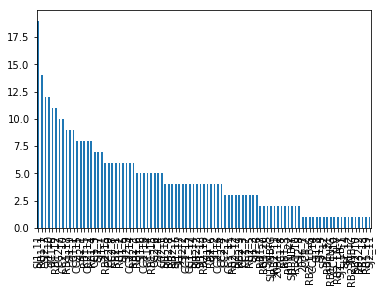

In [46]:
#look for correspondance between midge presence and open pollination 

def midge_pos(midge): 
    if (midge[2]=='Diptera'):
        return 1
    else:
        return 0 

df_specimens_by_tree['midge_pos']= df_specimens_by_tree.apply(lambda x: midge_pos(x) and not wasp_pos(x), axis=1)

trees_w_midges = df_specimens_by_tree[df_specimens_by_tree['midge_pos']==1]

midge_counts_by_tree = df_specimens_by_tree[df_specimens_by_tree['midge_pos']==1]['Tree_ID'].value_counts()

midge_counts_by_tree.plot(kind='bar')
print(len(midge_counts_by_tree))

midge_counts_df = pd.DataFrame(midge_counts_by_tree)
midge_reset = midge_counts_df.reset_index()
midge_counts_trees = midge_reset.rename(columns={'index': 'Tree_ID', 'Tree_ID': 'Midge_count'})


midge_pollen = midge_counts_trees.merge(df_pol_index, how='left',on='Tree_ID')
midge_pollen.dropna()
midge_pollen

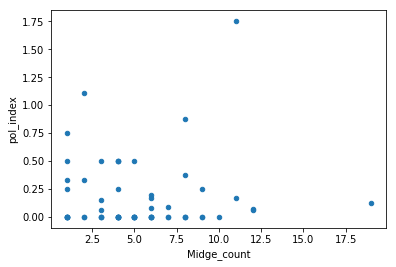

In [47]:
#plot midge count vs. pollenation index

midge_pollen.plot.scatter(x='Midge_count', y='pol_index')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))



In [52]:
midge_pollen.sort_values(by='pol_index', ascending=False)
midge_pollen.head(50)

,Tree_ID,Midge_count,Treatment,pol_index
0,SJ1_11,19,LB,0.125000
1,RB1_1,14,NB,NaN
2,SJ2_3,12,NB,0.062500
3,SJ1_10,12,LB,0.071429
4,CC1_6,11,NB,0.166667
5,RB1_12,11,LB,1.750000
6,CC2_7,10,NN,0.000000
7,CC2_10,10,LN,NaN
8,RB1_17,9,NB,0.250000
9,SJ1_9,9,LN,0.000000
